In [ ]:
# https://www.kaggle.com/karnikakapoor/spam-or-ham-sms-classifier/notebook

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("E:/Kaggle Practice/Spam or Ham/spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
GN                                                                                                                                                  2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
 I'll come up"                                                                                      

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# Drop redundent columns
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# axis=1 은 열(columns) 기준으로 삭제

# Redname the columns
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
# inplace = True 는 지금 바로, 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다
# 즉, inplace=Ture를 쓰면 객체를 만들지 않아도 된다. 'data =' 이런식으로 안써도된다.
# data = data.rename(columns={"v1":"Target", "v2":"Text"}) 이거와 동일하다
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Exploration

Text(0, 0.5, 'Number of Data points')

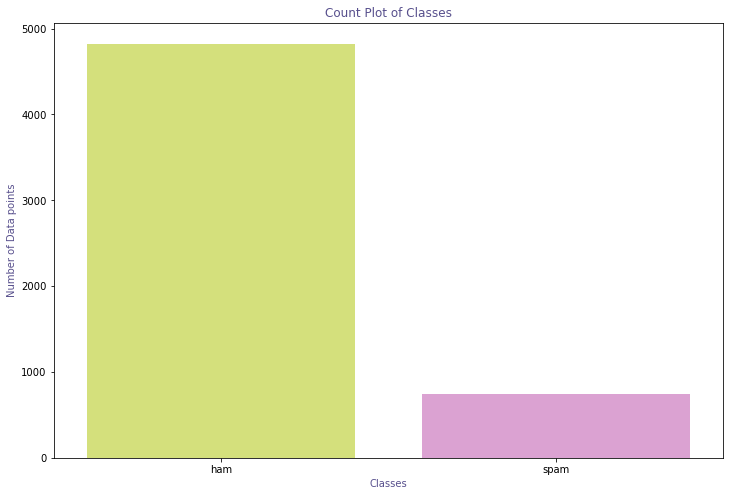

In [8]:
# Let us evaluate the 'Target' and find out if our data is imbalnced or not
cols = ["#E1F16B", "#E598D8"]
plt.figure(figsize=(12,8))
fg = sns.countplot(x=data["Target"], palette=cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [ ]:
# From the above countplot the data imbalance is quite evident

### Feature Engineering

In [ ]:
# For the purpose of data exploration, creating new features

# No_of_Characters: Number of characters in the text message
# No_of_Words: Number of words in the text message
# No_of_sentence: Number of sentences in the text message

In [9]:
# Adding a column of numbers of characters, words and sentences in each message
data["No_of_Characters"] = data['Text'].apply(len)
# apply 함수는 각 열에 연산을 하는 함수
data["No_of_Characters"]

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: No_of_Characters, Length: 5572, dtype: int64

In [10]:
print(data['Text'][1])

Ok lar... Joking wif u oni...


In [ ]:
# 위에 보면 1이 29인데 이게 글자 갯수를 의미
# 즉, data["No_of_Characters"]는 각 행의 글자 갯수를 의미한다
# space, 점 다 포함해서 계산

In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

data["No_of_Words"] = data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_Words"]

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: No_of_Words, Length: 5572, dtype: int64

In [15]:
print(data['Text'][5571])

Rofl. Its true to its name


In [ ]:
# "No_of_Words"는 글자 수 합계를 나타내는 것인데 
# 위에 5571번째 text를 보면 space 빼고
# Rofl, ., Its, true, to, its, name d

In [18]:
data["No_of_sentence"] = data.apply(lambda row: nltk.sent_tokenize(row["Text"]),axis=1).apply(len)
data["No_of_sentence"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: No_of_sentence, Length: 5572, dtype: int64

In [19]:
data.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.058327,18.699928,1.993001
std,59.623937,13.738763,1.503584
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
data.describe().T
# T means Transpose. 즉 '행과 열을 바꿔서 출력해라' 라는 뜻이다.

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.058327,59.623937,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699928,13.738763,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.993001,1.503584,1.0,1.0,2.0,2.0,38.0


<Figure size 864x576 with 0 Axes>

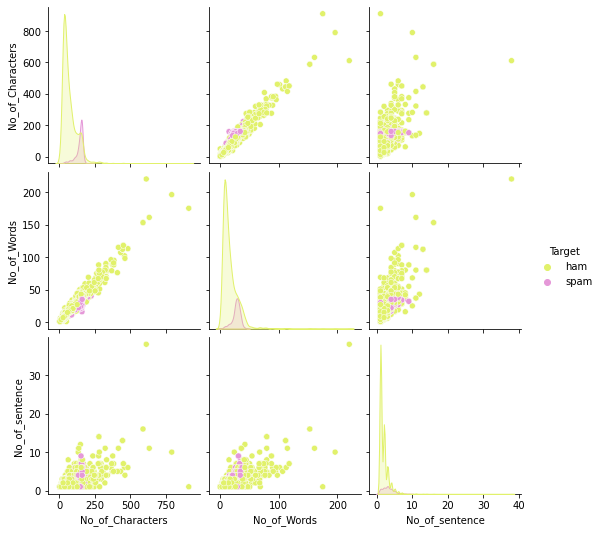

In [21]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target", palette=cols)
plt.show(fg)

In [ ]:
# From the pairplot, we can see a few ouliers all in the class ham.
# I shall be dropping the outliers

### Outlier Detection

In [23]:
# Dropping the outliers
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 5)

<Figure size 864x576 with 0 Axes>

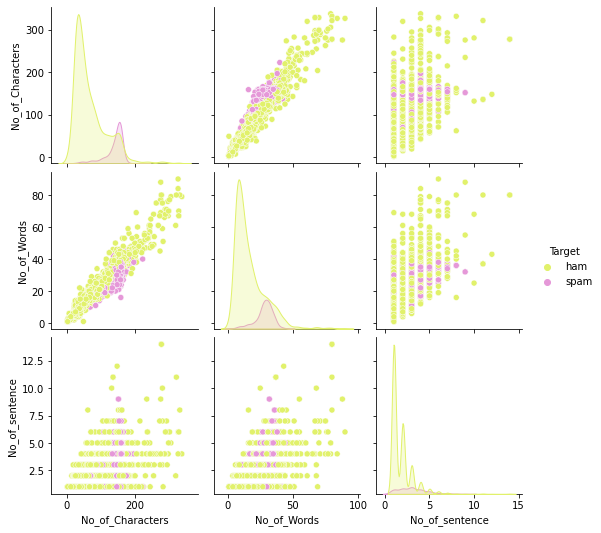

In [24]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target", palette=cols)
plt.show(fg)